# Portfolio Project: Biodiversity in National Parks

## Introduction
The objective of this project is to analyze the data from the National Parks Service about endangered species in different parks to find out if there are any patterns or themes related to the types of species that become endangered.

As part of the investigation process, the project will clean up, analyze, and plot data as well as pose questions and seek to answer them in a meaningful way.

The final project deliverable will be this report as well as a power point executive summary of the most important findings.
### Data Sources
2 csv format files, 'Observations.csv' and 'Species_info.csv', both provided by Codecademy.com.

## Scope of Work
### Project Goals
The National Park Service board is worried about the survival of the species that live within each park, to ensure the current biodiversity. In this context, they hired a data scientist to help them to understand characteristics about the species and their conservation status, as well as the amount of observations shown per specie. The board's expectation is to find an answer for the following questions:
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?

### Project Setup
In this section, all pertinent python packages packages will be loaded. The data required for analysis will be read and stored in 2 variables, then modified to give the columns of each dataframe a name easier to manage with code.

### Data Exploration and Preparation
Some basic operations will be performed in this section across the 2 datasets for obtaining summary statistics before moving forward with the main analysis and questions.

### Analysis
After exploring and cleaning the data, this project will perform some data arrangement and visualization techniques to interpret the data. Some statistical tests will also be performed to find out if the observed values are statistically significant.

## Project Setup

In [106]:
# Importing all required Python libraries:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Reading csv files as pandas dataframe:
obs = pd.read_csv('observations.csv')
spec_info = pd.read_csv('species_info.csv')

# Exploring both dataframes:
print(obs.columns)
print('')
print(spec_info.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [107]:
# Giving columns shorter names:
obs.rename(columns={'scientific_name': 'sci_name', 'park_name': 'park', 'observations': 'num_obs'}, inplace=True)
spec_info.rename(columns={'scientific_name': 'sci_name', 'common_names': 'names', 'conservation_status': 'status'}, inplace=True)

# Exploring first rows:
print(obs.head())
print('\n')
print(spec_info.head())

# Filling blanks in 'status' (spec_info) dataframe:
spec_info.status.fillna('No Intervention', inplace=True)

                   sci_name                                 park  num_obs
0        Vicia benghalensis  Great Smoky Mountains National Park       68
1            Neovison vison  Great Smoky Mountains National Park       77
2         Prunus subcordata               Yosemite National Park      138
3      Abutilon theophrasti                  Bryce National Park       84
4  Githopsis specularioides  Great Smoky Mountains National Park       85


  category                       sci_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                               names status  
0                           Gapper's Red-Backed Vole    NaN  
1                              American Bison, Bison    NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...    NaN  
3  Domestic Sheep, Mouflon, Red She

## Data Exploration and Preparation

### Observations Dataset

In [108]:
# Number of entries in dataset:
print(len(obs))

23296


In [109]:
# Number of species in dataframe by scientific name:
print(obs.sci_name.nunique())

5541


In [110]:
# Number of parks in dataframe:
print(obs.park.nunique())

# Names of parks in dataframe:
print(obs.park.unique())

4
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [111]:
# Number of total observations:
print(obs.num_obs.sum())

3314739


In [112]:
# Max number of observations per entry:
print(obs.num_obs.max())

321


In [113]:
# Min number of observations per entry:
print(obs.num_obs.min())

9


### Species Information Dataset

In [114]:
# Number of entries in dataset:
print(len(spec_info))

5824


In [115]:
# Number of categories in dataframe:
print(spec_info.category.nunique())

# Names of categories in dataframe:
print(spec_info.category.unique())

7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [116]:
# Number of species in dataframe by scientific name:
print(spec_info.sci_name.nunique())

5541


In [117]:
# Number of species in dataframe by common name:
print(spec_info.names.nunique())

5504


In [118]:
# Number of types of status in dataframe:
print(spec_info.status.nunique())

# Names of types of status in dataframe:
print(spec_info.status.unique())

5
['No Intervention' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


It can be seen that there are 5,824 entries in the dataframe, however only 5,541 unique species by scientific name.
Therefore, to find and eliminate the duplicates:

In [119]:
# Finding duplicates:
duplicates = spec_info[spec_info.sci_name.duplicated()]
print(duplicates.head())

# Testing differences (with 'Puma concolor' as an example to find the differences):
print(spec_info[spec_info.sci_name == 'Puma concolor'])

     category                sci_name                                 names  \
3017   Mammal          Cervus elaphus                    Rocky Mountain Elk   
3019   Mammal  Odocoileus virginianus  White-Tailed Deer, White-Tailed Deer   
3020   Mammal             Canis lupus                       Gray Wolf, Wolf   
3022   Mammal           Puma concolor           Cougar, Mountain Lion, Puma   
3025   Mammal        Lutra canadensis                           River Otter   

               status  
3017  No Intervention  
3019  No Intervention  
3020      In Recovery  
3022  No Intervention  
3025  No Intervention  
     category       sci_name                        names           status
16     Mammal  Puma concolor      Panther (Mountain Lion)  No Intervention
3022   Mammal  Puma concolor  Cougar, Mountain Lion, Puma  No Intervention
4451   Mammal  Puma concolor                Mountain Lion  No Intervention


It will be better to create a new dataset with unique scientific names, and to combine all possible categories, common names and conservation status.

In [120]:
# Creating new df without duplicates - this will lose some detail on 'names', which will not be used for analysis:
new_spec_info = spec_info.drop_duplicates(subset='sci_name')
print(len(new_spec_info))

5541


In [121]:
# Creating 1 unique df by merging 'obs' and 'spec_info':
all_data = pd.merge(obs, new_spec_info, on='sci_name', how='left', indicator=False, validate='many_to_one')
print(all_data.head())

                   sci_name                                 park  num_obs  \
0        Vicia benghalensis  Great Smoky Mountains National Park       68   
1            Neovison vison  Great Smoky Mountains National Park       77   
2         Prunus subcordata               Yosemite National Park      138   
3      Abutilon theophrasti                  Bryce National Park       84   
4  Githopsis specularioides  Great Smoky Mountains National Park       85   

         category                               names           status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch  No Intervention  
1          Mammal                       American Mink  No Intervention  
2  Vascular Plant                        Klamath Plum  No Intervention  
3  Vascular Plant                          Velvetleaf  No Intervention  
4  Vascular Plant                      Common Bluecup  No Intervention  


## Main Analysis

### Question 1: What is the distribution of conservation status for the species?
For answering this initial question, it is required to count the different species classified by category and see in which bucket it falls according to its conservation status.

In [122]:
# Creating tables from 'all_data', grouping species counts by 'status' and 'category':
species_status_category = new_spec_info.groupby(['status', 'category']).sci_name.count().reset_index()
species_status = new_spec_info.groupby('status').sci_name.count().reset_index()

# Sorting tables according to severity of 'status':
sorter = ['No Intervention', 'In Recovery', 'Species of Concern', 'Threatened', 'Endangered']
species_status_category.status = pd.Categorical(species_status_category.status, sorter, ordered=True)
species_status_category.sort_values('status', ascending=True, inplace=True)
species_status.status = pd.Categorical(species_status.status, sorter, ordered=True)
species_status.sort_values('status', ascending=True, inplace=True)

# Table without 'No Intervention' status:
species_status_cat_noNI = new_spec_info[new_spec_info.status != 'No Intervention'].groupby(['status', 'category']).sci_name.count().reset_index()
sorter1 = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']
species_status_cat_noNI.status = pd.Categorical(species_status_cat_noNI.status, sorter1, ordered=True)
species_status_cat_noNI.sort_values('status', ascending=True, inplace=True)

print(species_status, '\n')
print(species_status_cat_noNI)

               status  sci_name
2     No Intervention      5363
1         In Recovery         3
3  Species of Concern       151
4          Threatened         9
0          Endangered        15 

                status           category  sci_name
5          In Recovery               Bird         3
8   Species of Concern               Fish         4
12  Species of Concern     Vascular Plant        43
11  Species of Concern            Reptile         5
6   Species of Concern          Amphibian         4
7   Species of Concern               Bird        68
10  Species of Concern  Nonvascular Plant         5
9   Species of Concern             Mammal        22
14          Threatened               Fish         3
13          Threatened          Amphibian         2
16          Threatened     Vascular Plant         2
15          Threatened             Mammal         2
4           Endangered     Vascular Plant         1
3           Endangered             Mammal         6
2           Endangered    

In [123]:
# Creating pivot table for obtaining exact distribution of number of species by category by conservation status:
species_status_cat_NI_pivot = species_status_cat_noNI.pivot(columns='category', index='status', values='sci_name')
species_status_cat_NI_pivot

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
status,,,,,,,
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,3.0,2.0,NaN,NaN,2.0
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0


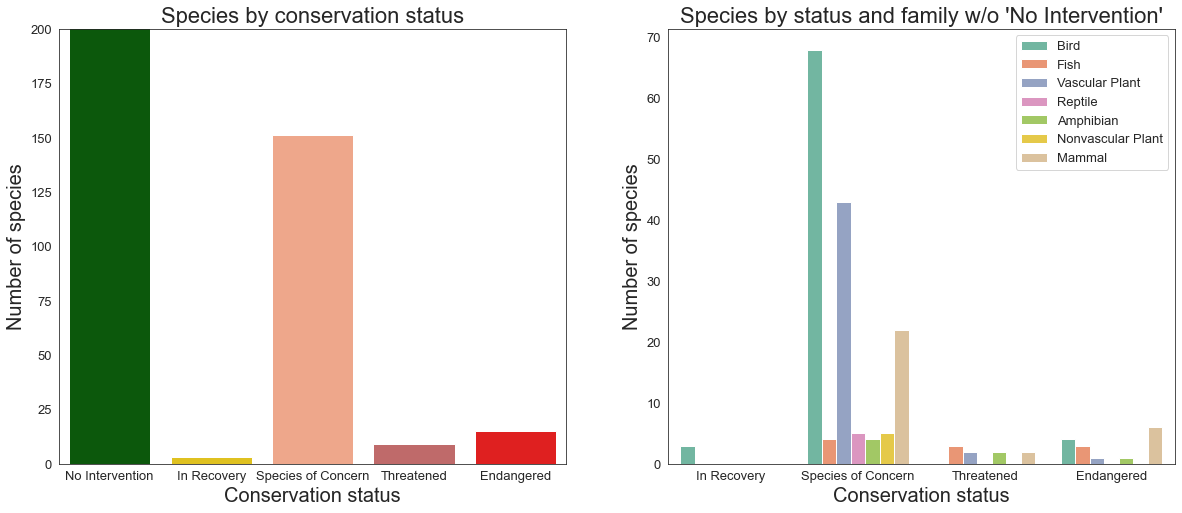

In [124]:
# Creating bar plot for species count classified by conservation status and category:
sns.set_style('white')
plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)

ax1 = plt.subplot(1,2,1)
colors = ['darkgreen', 'gold', 'lightsalmon', 'indianred', 'red']
ax1 = sns.barplot(data=species_status, x='status', y='sci_name', palette=colors)
ax1.set(ylim=(0,200))
ax1.set_title('Species by conservation status', fontsize=22)
ax1.set_xlabel('Conservation status', fontsize=20)
ax1.set_ylabel('Number of species', fontsize=20)

ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(data=species_status_cat_noNI, x='status', y='sci_name', hue='category', palette='Set2')
ax2.legend(fontsize=13, loc='upper right')
ax2.set_title('Species by status and family w/o \'No Intervention\'', fontsize=22)
ax2.set_xlabel('Conservation status', fontsize=20)
ax2.set_ylabel('Number of species', fontsize=20)

plt.savefig("Species_by_Conservation_Status.png")
plt.show()

In the charts and tables above, we can see that there are 178 species 'at some degree of danger' (excluding 'No Intervention'). In this subset, 151 are 'Species of Concern' (85%), which luckily is the least critical group of species that are in some sort of danger of dissapearing. The endangered species, the most critical group, represent 15 species in total, or 8% of the total species 'at some degree of danger'.

Regarding categories or families, the birds are the largest group (75 species in total), most of them being 'Species of Concern' (68 in total, or 91% of the whole birds category). The second largest group are the vascular plants (46 species in total), most of them also in the 'Species of Concern' group (43 out of 46 in total, or 93%).

For the mammals (30 species 'at some degree of danger’), 8 species are ‘Threatened’ or ‘Endangered’ (27% of this subset), making it the family that should concern the parks the most.

### Question 2: Are certain types of species more likely to be endangered?
One way to answer this question is to classify the families or categories to find the number of species within each family that are currently protected (because they fall into one of these buckets: 'In recovery', 'Species of Concern', 'Threatened' or 'Endangered'), and the ones not protected ('No Intervention'). The species in the second group are the ones with a certain level of risk because currently there is no protection program established for them (the parks assume that this protection is currently not needed).

In [125]:
# Creating new table from 'species_status_category' with 2 columns 'Protected', and 'Not protected'
species_status_category['protection'] = species_status_category.status != 'No Intervention'
species_status_protected = species_status_category.groupby(['protection', 'category']).sci_name.sum().reset_index()
species_status_protected_pivot = species_status_protected.pivot(columns='protection', index='category', values='sci_name').reset_index()
species_status_protected_pivot.columns = ['Category', 'Not protected', 'Protected']
species_status_protected_pivot['Perc protected'] = round(species_status_protected_pivot['Protected']/species_status_protected_pivot['Not protected']*100,0)
print(species_status_protected_pivot)

            Category  Not protected  Protected  Perc protected
0          Amphibian             72          7            10.0
1               Bird            413         75            18.0
2               Fish            115         10             9.0
3             Mammal            146         30            21.0
4  Nonvascular Plant            328          5             2.0
5            Reptile             73          5             7.0
6     Vascular Plant           4216         46             1.0


From the table, it is clear that the family which has the largest amount of species under protection are the vascular plants (46 species), yet the mammals and the birds are the family with the biggest percentage of species currently protected (21% and 18% respectively).

The plants (vascular and non vascular) have less than 2% of the total species under some protection program, yet since they are not animals they appear to be less affected by external effects in their surroundings.

### Question 3: Are the differences between species and their conservation status significant?
It will be necessary to assess the statistical significance of the relationship between the category/family and the protection variable to know if there is a significant association between the variables. For this, the chi-square test will be used (since this test is between 2 categorical variables, one of them binary).

In [126]:
# Loading the required statistics package:
from scipy.stats import chi2_contingency

# Testing the association between 'Protection' and 'Category' for 'Mammal' and 'Bird':
freq_mammal_bird = [[146, 30], [413, 75]]
chi2, pval1, dof, expected = chi2_contingency(freq_mammal_bird)
print(pval1)

0.6875948096661336


Since the p-val for this initial test is above 0.05, it can be concluded that for mammals and birds, there is no significant association between the category and the level of 'protection' that the families have. Now, the test will be done 2 more times between mammals and fishes, and mammals and reptiles.

In [127]:
# Testing the association between 'Protection' and 'Category' for 'Mammal' and 'Fish':
freq_mammal_fish = [[146, 30], [115, 10]]
chi2, pval2, dof, expected = chi2_contingency(freq_mammal_fish)
print(pval2)

0.03521990485242023


In this case, the p-val was below 0.05, therefore it can be inferred that there is significant association between the category and the level of protection. Mammals indeed are shown to require significant level of protection compared to fishes.

In [128]:
# Testing the association between 'Protection' and 'Category' for 'Mammal' and 'Reptile':
freq_mammal_reptile = [[146, 30], [73, 5]]
chi2, pval3, dof, expected = chi2_contingency(freq_mammal_reptile)
print(pval3)

0.03835559022969898


Once again, the p-val result was below 0.05, therefore it can be inferred that there is significant association between the category and the level of protection for mammals when compared to reptiles. Below the other tests can be found for the remainder of all the possible combinations between families (15 in total). A function will be created for this purpose:

In [129]:
# Creating function for testing chi2 for all combinations:
def chi2result(cat1, cat2):
    fam1 = species_status_protected_pivot[species_status_protected_pivot.Category == cat1]
    fam2 = species_status_protected_pivot[species_status_protected_pivot.Category == cat2]
    a = fam1['Not protected'].values[0]
    b = fam1['Protected'].values[0]
    x = fam2['Not protected'].values[0]
    y = fam2['Protected'].values[0]
    freq = [[a,b],[x,y]]
    chi2, pvalue, dof, expected = chi2_contingency(freq)
    print('The pvalue between category and \'protection\' for ' + cat1 + ' and '+ cat2 + ' is: ' + str(round(pvalue,4)))

In [130]:
# Testing all combinations:
chi2result('Amphibian', 'Bird')
chi2result('Amphibian', 'Fish')
chi2result('Amphibian', 'Mammal')
chi2result('Amphibian', 'Nonvascular Plant')
chi2result('Amphibian', 'Reptile')
chi2result('Amphibian', 'Vascular Plant')
chi2result('Bird', 'Fish')
chi2result('Bird', 'Mammal')
chi2result('Bird', 'Nonvascular Plant')
chi2result('Bird', 'Reptile')
chi2result('Bird', 'Vascular Plant')
chi2result('Fish', 'Mammal')
chi2result('Fish', 'Nonvascular Plant')
chi2result('Fish', 'Reptile')
chi2result('Fish', 'Vascular Plant')
chi2result('Mammal', 'Nonvascular Plant')
chi2result('Mammal', 'Reptile')
chi2result('Mammal', 'Vascular Plant')
chi2result('Nonvascular Plant', 'Reptile')
chi2result('Nonvascular Plant', 'Vascular Plant')
chi2result('Reptile', 'Vascular Plant')

The pvalue between category and 'protection' for Amphibian and Bird is: 0.1759
The pvalue between category and 'protection' for Amphibian and Fish is: 0.9654
The pvalue between category and 'protection' for Amphibian and Mammal is: 0.1276
The pvalue between category and 'protection' for Amphibian and Nonvascular Plant is: 0.0018
The pvalue between category and 'protection' for Amphibian and Reptile is: 0.7815
The pvalue between category and 'protection' for Amphibian and Vascular Plant is: 0.0
The pvalue between category and 'protection' for Bird and Fish is: 0.0475
The pvalue between category and 'protection' for Bird and Mammal is: 0.6876
The pvalue between category and 'protection' for Bird and Nonvascular Plant is: 0.0
The pvalue between category and 'protection' for Bird and Reptile is: 0.0531
The pvalue between category and 'protection' for Bird and Vascular Plant is: 0.0
The pvalue between category and 'protection' for Fish and Mammal is: 0.0352
The pvalue between category and '

### Question 4: Which species were spotted the most at each park?
This question will be answered in 2 parts. First, an analysis of the amount of observations per park and family/category will be performed to have a visualization of the predominant family per park (it would be too complex to visualize a graph with the breakdown of observations per park per specie). However, a list of the most spotted species per park will also be made.

In [131]:
# Creating table for visualization of observations per family and park:
obs_park_category = all_data.groupby(['park', 'category']).num_obs.sum().reset_index()
obs_park_category_pivot = obs_park_category.pivot(columns='category', index='park', values='num_obs').reset_index()
obs_park_category_pivot

category,park,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
0,Bryce National Park,7380,51647,12423,20550,32992,7950,443083
1,Great Smoky Mountains National Park,5707,37728,9206,15012,24857,5691,333619
2,Yellowstone National Park,19440,127251,30574,50795,83021,19554,1112927
3,Yosemite National Park,11444,76207,18615,30339,49783,11483,665461


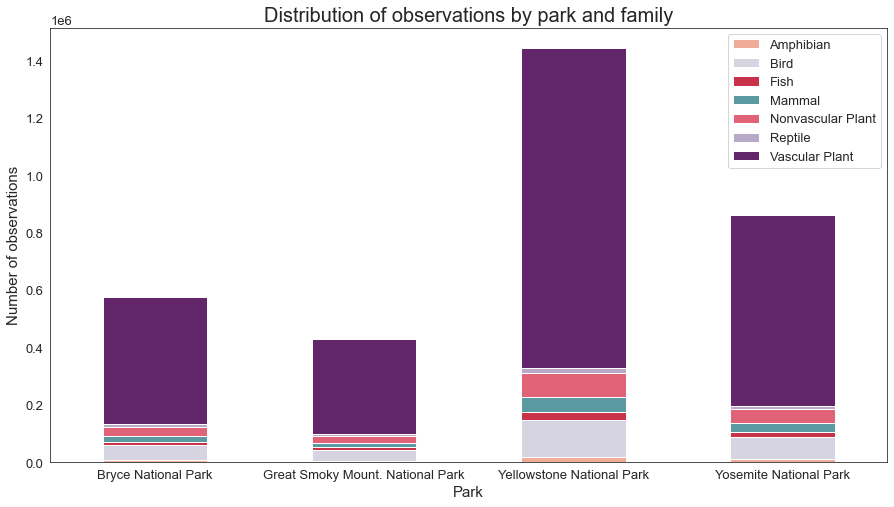

In [132]:
# Creating stacker bar chart:
sns.set_style('white')
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)

colors = ['#eeac99', '#d6d4e0', '#c83349', '#5b9aa0', '#e06377', '#b8a9c9', '#622569']
ax = obs_park_category_pivot.plot(kind = 'bar', figsize=(15,8), stacked=True, color=colors)
plt.xticks(rotation=0)
ax.set_xticklabels(['Bryce National Park', 'Great Smoky Mount. National Park', 'Yellowstone National Park', 'Yosemite National Park'])
ax.set_xlabel("Park", fontsize=15)
ax.set_ylabel("Number of observations", fontsize=15)
ax.set_title('Distribution of observations by park and family', fontsize=20)
plt.legend(fontsize=13)

plt.savefig("Categories_by_observations.png")
plt.show()

It can be observed that of all parks, Yellowstone is the one with the largest amount of observations by far (1,443,562). The family that has the largest amount of observations (consistently across all 4 parks) are the vascular plants, followed by birds and non vascular plants.
Now it is time to see which are the Top 10 observed species in each park.

In [133]:
# Using the 'obs' database for generating 4 new tables, one for each park:
bryce_species = obs[obs.park == 'Bryce National Park']
gsm_species = obs[obs.park == 'Great Smoky Mountains National Park']
yellowstone_species = obs[obs.park == 'Yellowstone National Park']
yosemite_species = obs[obs.park == 'Yosemite National Park']

# Aggregating tables for eliminated duplicates:
bryce_species = bryce_species.groupby(['sci_name', 'park']).num_obs.sum().reset_index()
gsm_species = gsm_species.groupby(['sci_name', 'park']).num_obs.sum().reset_index()
yellowstone_species = yellowstone_species.groupby(['sci_name', 'park']).num_obs.sum().reset_index()
yosemite_species = yosemite_species.groupby(['sci_name', 'park']).num_obs.sum().reset_index()

# Sorting tables by number of observations:
bryce_species.sort_values(by='num_obs', ascending=False, inplace=True)
gsm_species.sort_values(by='num_obs', ascending=False, inplace=True)
yellowstone_species.sort_values(by='num_obs', ascending=False, inplace=True)
yosemite_species.sort_values(by='num_obs', ascending=False, inplace=True)

# Adding common names from 'new_spec_info'
bryce_species_name = bryce_species.merge(new_spec_info[['sci_name','names', 'category']],how='left',on='sci_name')
gsm_species_name = gsm_species.merge(new_spec_info[['sci_name','names', 'category']],how='left',on='sci_name')
yellowstone_species_name = yellowstone_species.merge(new_spec_info[['sci_name','names', 'category']],how='left',on='sci_name')
yosemite_species_name = yosemite_species.merge(new_spec_info[['sci_name','names', 'category']],how='left',on='sci_name')

In [134]:
bryce_species_name.head(10)

,sci_name,park,num_obs,names,category
0,Columba livia,Bryce National Park,339,Rock Dove,Bird
1,Puma concolor,Bryce National Park,311,Panther (Mountain Lion),Mammal
2,Avena sativa,Bryce National Park,303,"Cultivated Oat, Oats",Vascular Plant
3,Streptopelia decaocto,Bryce National Park,301,Eurasian Collared-Dove,Bird
4,Myotis lucifugus,Bryce National Park,298,"Little Brown Bat, Little Brown Myotis",Mammal
5,Holcus lanatus,Bryce National Park,296,"Common Velvet Grass, Velvetgrass",Vascular Plant
6,Hypochaeris radicata,Bryce National Park,294,"Cat's Ear, Spotted Cat's-Ear",Vascular Plant
7,Castor canadensis,Bryce National Park,278,"American Beaver, Beaver",Mammal
8,Viola arvensis,Bryce National Park,277,Field Pansy,Vascular Plant
9,Amaranthus albus,Bryce National Park,268,"White Amaranthus, White Pigweed",Vascular Plant


In [135]:
gsm_species_name.head(10)

,sci_name,park,num_obs,names,category
0,Streptopelia decaocto,Great Smoky Mountains National Park,256,Eurasian Collared-Dove,Bird
1,Procyon lotor,Great Smoky Mountains National Park,247,"Common Raccoon, Raccoon",Mammal
2,Castor canadensis,Great Smoky Mountains National Park,243,"American Beaver, Beaver",Mammal
3,Puma concolor,Great Smoky Mountains National Park,239,Panther (Mountain Lion),Mammal
4,Fragaria virginiana,Great Smoky Mountains National Park,217,"Virginia Strawberry, Wild Strawberry",Vascular Plant
5,Holcus lanatus,Great Smoky Mountains National Park,216,"Common Velvet Grass, Velvetgrass",Vascular Plant
6,Microtus longicaudus,Great Smoky Mountains National Park,212,"Coronation Island Vole, Long-Tailed Vole",Mammal
7,Apocynum androsaemifolium,Great Smoky Mountains National Park,210,Spreading Dogbane,Vascular Plant
8,Polygonum aviculare,Great Smoky Mountains National Park,206,Bird Knotweed,Vascular Plant
9,Sus scrofa,Great Smoky Mountains National Park,205,"Feral Hog, Wild Pig",Mammal


In [136]:
yellowstone_species_name.head(10)

,sci_name,park,num_obs,names,category
0,Holcus lanatus,Yellowstone National Park,805,"Common Velvet Grass, Velvetgrass",Vascular Plant
1,Streptopelia decaocto,Yellowstone National Park,771,Eurasian Collared-Dove,Bird
2,Puma concolor,Yellowstone National Park,753,Panther (Mountain Lion),Mammal
3,Procyon lotor,Yellowstone National Park,745,"Common Raccoon, Raccoon",Mammal
4,Hypochaeris radicata,Yellowstone National Park,726,"Cat's Ear, Spotted Cat's-Ear",Vascular Plant
5,Columba livia,Yellowstone National Park,722,Rock Dove,Bird
6,Castor canadensis,Yellowstone National Park,703,"American Beaver, Beaver",Mammal
7,Myotis lucifugus,Yellowstone National Park,679,"Little Brown Bat, Little Brown Myotis",Mammal
8,Bidens tripartita,Yellowstone National Park,602,"Stick-Tight, Three-Lobe Beggar-Ticks",Vascular Plant
9,Sorex hoyi,Yellowstone National Park,573,Pygmy Shrew,Mammal


In [137]:
yosemite_species_name.head(10)

,sci_name,park,num_obs,names,category
0,Hypochaeris radicata,Yosemite National Park,505,"Cat's Ear, Spotted Cat's-Ear",Vascular Plant
1,Castor canadensis,Yosemite National Park,501,"American Beaver, Beaver",Mammal
2,Holcus lanatus,Yosemite National Park,463,"Common Velvet Grass, Velvetgrass",Vascular Plant
3,Streptopelia decaocto,Yosemite National Park,457,Eurasian Collared-Dove,Bird
4,Procyon lotor,Yosemite National Park,453,"Common Raccoon, Raccoon",Mammal
5,Columba livia,Yosemite National Park,423,Rock Dove,Bird
6,Puma concolor,Yosemite National Park,408,Panther (Mountain Lion),Mammal
7,Myotis lucifugus,Yosemite National Park,396,"Little Brown Bat, Little Brown Myotis",Mammal
8,Nepeta cataria,Yosemite National Park,387,Catnip,Vascular Plant
9,Agrostis variabilis,Yosemite National Park,382,Mountain Bentgrass,Vascular Plant


As we can see, most of the Top 10 most-spotted species appear across all parks. The most spotted species, the velveltgrass, appears in the Top 10 of all 4 parks. The Rock Dove, the most spotted specie in the Bryce National Park, appears in the Top 10 of Yellowstone and Yosemite parks; the Eurasian-Collared Dove (most-spotted specie in the Great Smoky Mountains Park) appears in all 4 Top 10; while the Cat's Ear Plant (most-spotted specie in the Yosemite Park) appears in 3 out of 4 Top 10 (does not appear in the Great Smoky Mountains Park Top 10). 2 Top 10 are leaded by bird species, and the other 2 by vascular plant species.

## Conclusions
From the data, this project allowed to understand certain characteristics about the species (categories, parks, conservation status, and number of observations) to draw conclusions about the current biological variety within each of the 4 parks. The parks were particularly interested in answering the following questions, and these are the results from the research:
- **What is the distribution of conservation status for species?**
There are 178 species excluding 'No Intervention'. Of this group, 151 are 'Species of Concern' (85%). The threatened species are 9 in total (5%); while the endangered species represent 15 species in total, or 8% of the total species 'at some degree of danger'. The birds are the largest group (75 species in total), most of them being 'Species of Concern' (68 in total, or 91% of the whole birds category)


- **Are certain types of species more likely to be endangered?**
The family which has the largest amount of species under protection are the vascular plants (46 species), yet the mammals and the birds are the family with the biggest percentage of species currently protected (21% and 18% respectively)


- **Are the differences between species and their conservation status significant? (chi2 test between category and status)**
For mammals and birds: p-val is above 0.05, there is no significant association between the category and the level of 'protection' that the families have.
For mammals and fishes: p-val is below 0.05, there is significant association between the category and the level of protection.
For mammals and reptiles: p-val result is below 0.05, there is significant association between the category and the level of protection.


- **Which species were spotted the most at each park?**
The velveltgrass, the most spotted species, appears in the Top 10 of all 4 parks. The Rock Dove, the most spotted specie in the Bryce National Park, appears in the Top 10 of Yellowstone and Yosemite parks; the Eurasian-Collared Dove (most-spotted specie in the Great Smoky Mountains Park) appears in all 4 Top 10; while the Cat's Ear Plant (most-spotted specie in the Yosemite Park) appears in 3 out of 4 Top 10 (does not appear in the Great Smoky Mountains Park Top 10).

## Next Steps
Since this dataset only included observations from the last 7 days , it would have been interesting to have more data to find out the conservation status for various species for longer periods of time. Also, having the area per park would have been very useful since it would have allowed to calculate the average number of observation/m2 for instance. 